<a href="https://colab.research.google.com/github/scarlxrd54288/Laboratorio-02---Rodriguez-Medina-Leyla-Camila/blob/main/Primer_Parcial_10_Clases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias Importadas

In [1]:
# 0: Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
import seaborn as sns

Cargado del Dataset

In [2]:
# 1. Cargar y preprocesar el dataset

# Lee el archivo CSV y carga sus datos en un DataFrame de pandas llamado 'dataset'
dataset = pd.read_csv('/content/test.csv')

# Obtén el número total de filas en el DataFrame
num_filas = dataset.shape[0]
# Imprime el número de filas en el DataFrame
print(f"Número de filas: {num_filas}")


Número de filas: 16626


Se asignan X y y de el dataset original

In [3]:
# Crea una nueva variable 'X_original' que contiene todas las columnas del DataFrame, excepto la columna 'species'
X_original = dataset.drop(columns=['species','id'])

# Crea una nueva variable 'y_original' que contiene solo la columna 'species' del DataFrame
y_original = dataset['species']

# Construcción del Dataset sintético



> np.random.choice: Esta función de NumPy selecciona aleatoriamente elementos de una lista o array. En este caso, se elige un valor de la lista ['norte', 'sur', 'este', 'oeste'].

['norte', 'sur', 'este', 'oeste'] es la lista de opciones posibles, que representa diferentes regiones.



> El parámetro size=len(dataset) indica que se deben hacer tantas selecciones como el número de filas del dataset (es decir, una por cada fila).



dataset['region']: Esta parte del código crea o sobrescribe una columna llamada region en el dataset dataset. A cada fila de esta columna se le asigna uno de los valores aleatorios seleccionados en el paso anterior.





In [4]:
# Agregar atributos con caracteres, texto y booleanos

# Añade una nueva columna 'region' al DataFrame con valores aleatorios que representan regiones ('norte', 'sur', 'este', 'oeste')
dataset['region'] = np.random.choice(['norte', 'sur', 'este', 'oeste'], size=len(dataset))

# Añade una nueva columna 'es_domestico' al DataFrame con valores booleanos aleatorios (True o False)
dataset['es_domestico'] = np.random.choice([True, False], size=len(dataset))

# Añade una nueva columna 'descripcion_color' al DataFrame con frases aleatorias que describen colores
dataset['descripcion_color'] = np.random.choice(
    ['color rojo brillante', 'azul profundo', 'verde esmeralda', 'amarillo brillante'],
    size=len(dataset)
)


# Normalización

In [5]:
# Normalizar los datos

# Selecciona las columnas numéricas del DataFrame 'dataset'
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

# Crea un nuevo DataFrame 'normalized_data' con solo las columnas numéricas del DataFrame original
normalized_data = dataset[numeric_columns]

# Normaliza los datos en 'normalized_data' usando la fórmula (valor - mínimo) / (máximo - mínimo)
# Esto escala los valores para que estén entre 0 y 1
normalized_data = (normalized_data - normalized_data.min()) / (normalized_data.max() - normalized_data.min())


# Mapeo de etiquetas categóricas a valores numéricos
En resumen, estas líneas convierten las etiquetas de species en valores numéricos, agregan estos valores al DataFrame original y al DataFrame normalizado, y luego muestran las primeras filas del DataFrame para confirmar que la conversión se ha realizado correctamente.

In [6]:
# Asignar valores únicos a las clases de la etiqueta 'species'

# Obtén los valores únicos de la columna 'species' y guárdalos en 'species_unique'
species_unique = dataset['species'].unique()

# Crea un diccionario que mapea cada valor único de 'species' a un índice numérico
species_mapping = {species: idx for idx, species in enumerate(species_unique)}

# Añade una nueva columna 'species_numeric' al DataFrame con los valores numéricos correspondientes a cada clase de 'species'
dataset['species_numeric'] = dataset['species'].map(species_mapping)

# Añade la nueva columna 'species_numeric' al DataFrame 'normalized_data'
normalized_data['species_numeric'] = dataset['species_numeric']

# Imprime las primeras filas del DataFrame para verificar que la columna 'species_numeric' se haya añadido correctamente
dataset.head()


,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species,region,es_domestico,descripcion_color,species_numeric
0,0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,...,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943,flammea,oeste,True,amarillo brillante,0
1,1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,...,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668,flammea,sur,True,color rojo brillante,0
2,2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,...,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293,flammea,norte,True,azul profundo,0
3,3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,...,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795,flammea,este,True,azul profundo,0
4,4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,...,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157,flammea,norte,True,verde esmeralda,0


# Filtrado de las primeras 10 clases
Estas líneas crean un filtro para seleccionar solo las filas correspondientes a las primeras 10 clases en species_numeric y aplican ese filtro al DataFrame normalizado. Posteriormete se imprime la nueva forma del dataset.

In [7]:
# Filtrar el dataset para las primeras 10 clases

# Define cuántas clases quieres seleccionar (en este caso, las primeras 10)
ten_classes = 10

# Crea una máscara booleana que indica si los valores en la columna 'species_numeric' están entre 0 y 9 (las primeras 10 clases)
mask_ten_classes = np.isin(normalized_data['species_numeric'], np.arange(ten_classes))

# Filtra el DataFrame 'normalized_data' usando la máscara para obtener solo las filas correspondientes a las primeras 10 clases
dataset_ten_classes = normalized_data[mask_ten_classes]

print(f"La forma del dataset sintético es: {dataset_ten_classes.shape}")


La forma del dataset sintético es: (4377, 171)


# Duplicar los ejemplos con criterios consistentes


1.   Se crea un dataset sintético añadiendo una versión perturbada del dataset original con ruido aleatorio y también incluyen una versión duplicada del dataset original (esta línea está comentada). Finalmente, muestran las dimensiones del nuevo dataset sintético
2.   Primero, se define una función llamada `variation` que aplica una pequeña perturbación aleatoria a los valores de un DataFrame. Esta perturbación se ajusta con un parámetro denominado `variation_factor`, que determina la intensidad de las variaciones. Luego, se utiliza esta función para modificar el DataFrame original (`dataset_ten_classes`), generando un nuevo DataFrame con los datos alterados. Posteriormente, se combinan el DataFrame original y el modificado para crear un dataset sintético que incluye tanto los datos originales como los perturbados. Finalmente, se muestran las primeras filas de este dataset sintético para confirmar que la perturbación se ha aplicado correctamente y que los datos se han combinado como se esperaba.





In [8]:
# Definir el factor de perturbación máximo
perturbation_max = 0.0000000000000005  # Valor máximo de la perturbación

# Crear un dataset sintético duplicando los datos originales y añadiendo ruido dentro del rango [0, 0.01]
synthetic_data = pd.concat([
    dataset_ten_classes,  # Datos originales
    dataset_ten_classes + np.random.uniform(0, perturbation_max, size=dataset_ten_classes.shape)  # Datos perturbados
], ignore_index=True)

# Mostrar los primeros registros del dataset sintético para verificar
print(synthetic_data.head())
"""

# Definir la función add_variation
def variation(df, variation_factor=0.1):
    return df * (1 + np.random.normal(0, variation_factor, df.shape))

# Añadir variación a todo el dataset
varied_dataset = variation(dataset_ten_classes)

# Concatenar los datos originales y los perturbados
synthetic_data = pd.concat([
    dataset_ten_classes,  # Datos originales
    varied_dataset  # Datos con perturbaciones aplicadas
], ignore_index=True)
"""
# Mostrar los primeros registros del dataset sintético para verificar
print(synthetic_data.head())
print(synthetic_data.shape)



         id  chromogram_0_0  chromogram_0_1  chromogram_0_10  chromogram_0_11  \
0  0.000000        1.000000        0.945010         0.749239         0.714735   
1  0.000060        0.650240        0.590953         0.712448         0.909643   
2  0.000120        1.000000        0.833204         0.770392         0.702114   
3  0.000180        0.991786        0.829834         0.769560         0.702358   
4  0.000241        0.982724        0.826881         0.768727         0.702756   

   chromogram_0_12  chromogram_0_2  chromogram_0_3  chromogram_0_4  \
0         0.704972        0.311380        0.881969        0.280565   
1         0.727012        0.502472        1.000000        0.242914   
2         0.655411        0.326861        0.922792        0.313091   
3         0.658252        0.327546        0.923581        0.312157   
4         0.662903        0.328236        0.924370        0.311229   

   chromogram_0_5  ...  spec_centr_12  spec_centr_2  spec_centr_3  \
0        0.519965  ... 

# Verificación los nombres de las columnas y las primeras filas del dataset original filtrado para las primeras 10 clases

In [9]:
from IPython.display import display

# Muestra los nombres de las columnas del dataset original filtrado 'dataset_ten_classes'
print("Columnas del dataset_ten_classes:")
column_names_df = pd.DataFrame(dataset_ten_classes.columns, columns=['Column Names'])
display(column_names_df)

# Muestra las primeras filas del dataset original filtrado para verificar cómo lucen los datos
print("\nPrimeras filas del dataset_ten_classes:")
display(dataset_ten_classes.head())

# Muestra los nombres de las columnas del dataset sintético 'synthetic_data'
print("\nColumnas del synthetic_data:")
column_names_df = pd.DataFrame(synthetic_data.columns, columns=['Column Names'])
display(column_names_df)

# Muestra las primeras filas del dataset sintético para verificar cómo lucen los datos
print("\nPrimeras filas del synthetic_data:")
display(synthetic_data.head())

# Muestra una sección del dataset sintético empezando desde el índice 16626
# Esto te permite revisar los datos en esa parte del dataset
start_index = 4377
print(f"\nDatos del synthetic_data desde que se duplican {start_index}:")
display(synthetic_data.iloc[start_index:])



Columnas del dataset_ten_classes:


,Column Names
0,id
1,chromogram_0_0
2,chromogram_0_1
3,chromogram_0_10
4,chromogram_0_11
...,...
166,spec_centr_6
167,spec_centr_7
168,spec_centr_8
169,spec_centr_9



Primeras filas del dataset_ten_classes:


,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species_numeric
0,0.000000,1.000000,0.945010,0.749239,0.714735,0.704972,0.311380,0.881969,0.280565,0.519965,...,0.509880,0.599284,0.579444,0.610433,0.611708,0.643596,0.628207,0.647889,0.635437,0
1,0.000060,0.650240,0.590953,0.712448,0.909643,0.727012,0.502472,1.000000,0.242914,0.337235,...,0.513554,0.599249,0.579407,0.610479,0.611741,0.643622,0.628129,0.647976,0.635326,0
2,0.000120,1.000000,0.833204,0.770392,0.702114,0.655411,0.326861,0.922792,0.313091,0.493060,...,0.513652,0.599214,0.579372,0.610524,0.611775,0.643648,0.628051,0.648063,0.635216,0
3,0.000180,0.991786,0.829834,0.769560,0.702358,0.658252,0.327546,0.923581,0.312157,0.492918,...,0.513162,0.599179,0.579336,0.610569,0.611809,0.643674,0.627974,0.648149,0.635106,0
4,0.000241,0.982724,0.826881,0.768727,0.702756,0.662903,0.328236,0.924370,0.311229,0.492777,...,0.513257,0.599143,0.579301,0.610613,0.611843,0.643698,0.627897,0.648236,0.634995,0



Columnas del synthetic_data:


,Column Names
0,id
1,chromogram_0_0
2,chromogram_0_1
3,chromogram_0_10
4,chromogram_0_11
...,...
166,spec_centr_6
167,spec_centr_7
168,spec_centr_8
169,spec_centr_9



Primeras filas del synthetic_data:


,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species_numeric
0,0.000000,1.000000,0.945010,0.749239,0.714735,0.704972,0.311380,0.881969,0.280565,0.519965,...,0.509880,0.599284,0.579444,0.610433,0.611708,0.643596,0.628207,0.647889,0.635437,0.0
1,0.000060,0.650240,0.590953,0.712448,0.909643,0.727012,0.502472,1.000000,0.242914,0.337235,...,0.513554,0.599249,0.579407,0.610479,0.611741,0.643622,0.628129,0.647976,0.635326,0.0
2,0.000120,1.000000,0.833204,0.770392,0.702114,0.655411,0.326861,0.922792,0.313091,0.493060,...,0.513652,0.599214,0.579372,0.610524,0.611775,0.643648,0.628051,0.648063,0.635216,0.0
3,0.000180,0.991786,0.829834,0.769560,0.702358,0.658252,0.327546,0.923581,0.312157,0.492918,...,0.513162,0.599179,0.579336,0.610569,0.611809,0.643674,0.627974,0.648149,0.635106,0.0
4,0.000241,0.982724,0.826881,0.768727,0.702756,0.662903,0.328236,0.924370,0.311229,0.492777,...,0.513257,0.599143,0.579301,0.610613,0.611843,0.643698,0.627897,0.648236,0.634995,0.0



Datos del synthetic_data desde que se duplican 4377:


,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species_numeric
4377,4.589839e-17,1.000000,0.945010,0.749239,0.714735,0.704972,0.311380,0.881969,0.280565,0.519965,...,0.509880,0.599284,0.579444,0.610433,0.611708,0.643596,0.628207,0.647889,0.635437,2.493917e-17
4378,6.015038e-05,0.650240,0.590953,0.712448,0.909643,0.727012,0.502472,1.000000,0.242914,0.337235,...,0.513554,0.599249,0.579407,0.610479,0.611741,0.643622,0.628129,0.647976,0.635326,3.262856e-16
4379,1.203008e-04,1.000000,0.833204,0.770392,0.702114,0.655411,0.326861,0.922792,0.313091,0.493060,...,0.513652,0.599214,0.579372,0.610524,0.611775,0.643648,0.628051,0.648063,0.635216,4.040590e-17
4380,1.804511e-04,0.991786,0.829834,0.769560,0.702358,0.658252,0.327546,0.923581,0.312157,0.492918,...,0.513162,0.599179,0.579336,0.610569,0.611809,0.643674,0.627974,0.648149,0.635106,2.298413e-16
4381,2.406015e-04,0.982724,0.826881,0.768727,0.702756,0.662903,0.328236,0.924370,0.311229,0.492777,...,0.513257,0.599143,0.579301,0.610613,0.611843,0.643698,0.627897,0.648236,0.634995,1.114891e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,8.316992e-01,0.325845,1.000000,0.722782,0.568833,0.368500,1.000000,0.563903,0.444026,1.000000,...,0.579980,0.541093,0.588596,0.612129,0.605530,0.608271,0.635368,0.602900,0.617831,1.000000e+00
8750,8.317594e-01,0.336711,1.000000,0.722203,0.577843,0.409945,1.000000,0.562818,0.444580,1.000000,...,0.585452,0.541102,0.588680,0.612116,0.605570,0.608284,0.635332,0.602827,0.617980,1.000000e+00
8751,8.318195e-01,0.309065,1.000000,0.721626,0.591026,0.477975,1.000000,0.561738,0.445139,1.000000,...,0.585023,0.541110,0.588765,0.612102,0.605611,0.608298,0.635296,0.602755,0.618130,1.000000e+00
8752,8.318797e-01,0.364169,0.915717,0.762614,0.983745,0.810951,0.856125,1.000000,1.000000,0.949184,...,0.588002,0.541119,0.588849,0.612088,0.605651,0.608313,0.635259,0.602683,0.618279,1.000000e+00


Asignar características y etiquetas al dataset sintético: Esto implica separar el dataset sintético (synthetic_data) en dos partes: características y etiquetas.



> Se excluye la columna species_numeric e id para obtener las características (X_synthetic).


> La columna species_numeric se asigna como las etiquetas (y_synthetic).





In [10]:
from IPython.display import display

# Asignar características y etiquetas al dataset sintético

# Excluye la columna 'species_numeric' y 'id' para obtener las características del dataset sintético
X_synthetic = synthetic_data.drop(columns=['species_numeric', 'id'])

# Asigna la columna 'species_numeric' como las etiquetas del dataset sintético
y_synthetic = synthetic_data['species_numeric']

# Muestra las primeras filas del dataset original para revisar las características y etiquetas originales
print("Dataset Original:")
display(X_original.head())  # Muestra las primeras filas de las características del dataset original
display(y_original.head())  # Muestra las primeras filas de las etiquetas del dataset original

# Muestra las primeras filas del dataset sintético para revisar las características y etiquetas sintéticas
print("\nDataset Sintético:")
display(X_synthetic.head())  # Muestra las primeras filas de las características del dataset sintético
display(y_synthetic.head())  # Muestra las primeras filas de las etiquetas del dataset sintético


Dataset Original:


,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_11,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9
0,1.000000,0.945011,0.749241,0.714737,0.704973,0.311386,0.881971,0.280575,0.519973,0.170108,...,2620.439113,2486.230223,2731.690858,2611.073052,2702.003237,2675.278369,2817.586461,2708.632709,2738.029236,2688.206943
1,0.650246,0.590960,0.712450,0.909643,0.727013,0.502476,1.000000,0.242925,0.337245,0.167843,...,2622.370901,2502.704268,2731.547262,2610.927073,2702.182796,2675.414148,2817.691756,2708.316600,2738.381425,2687.759668
2,1.000000,0.833207,0.770394,0.702116,0.655413,0.326867,0.922793,0.313101,0.493068,0.167065,...,2624.183206,2503.140943,2731.402739,2610.782378,2702.360640,2675.551167,2817.795126,2708.001038,2738.732677,2687.312293
3,0.991786,0.829836,0.769562,0.702360,0.658253,0.327552,0.923582,0.312167,0.492926,0.167125,...,2622.916155,2500.947915,2731.257282,2610.638981,2702.536770,2675.689443,2817.896605,2707.686054,2739.083012,2686.864795
4,0.982724,0.826884,0.768729,0.702757,0.662904,0.328242,0.924370,0.311239,0.492785,0.167188,...,2620.930438,2501.371362,2731.110899,2610.496832,2702.711164,2675.828998,2817.996191,2707.371616,2739.432406,2686.417157


,species
0,flammea
1,flammea
2,flammea
3,flammea
4,flammea



Dataset Sintético:


,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,chromogram_0_6,...,spec_centr_11,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9
0,1.000000,0.945010,0.749239,0.714735,0.704972,0.311380,0.881969,0.280565,0.519965,0.170101,...,0.600287,0.509880,0.599284,0.579444,0.610433,0.611708,0.643596,0.628207,0.647889,0.635437
1,0.650240,0.590953,0.712448,0.909643,0.727012,0.502472,1.000000,0.242914,0.337235,0.167836,...,0.600757,0.513554,0.599249,0.579407,0.610479,0.611741,0.643622,0.628129,0.647976,0.635326
2,1.000000,0.833204,0.770392,0.702114,0.655411,0.326861,0.922792,0.313091,0.493060,0.167058,...,0.601199,0.513652,0.599214,0.579372,0.610524,0.611775,0.643648,0.628051,0.648063,0.635216
3,0.991786,0.829834,0.769560,0.702358,0.658252,0.327546,0.923581,0.312157,0.492918,0.167117,...,0.600890,0.513162,0.599179,0.579336,0.610569,0.611809,0.643674,0.627974,0.648149,0.635106
4,0.982724,0.826881,0.768727,0.702756,0.662903,0.328236,0.924370,0.311229,0.492777,0.167181,...,0.600406,0.513257,0.599143,0.579301,0.610613,0.611843,0.643698,0.627897,0.648236,0.634995


,species_numeric
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


# Crear gráficas representativas de los datos

La gráfica compara la distribución de la característica chromogram_0_0 en el dataset original y en el dataset sintético. Se presentan dos histogramas lado a lado en una sola figura: el gráfico de la izquierda muestra la distribución de chromogram_0_0 en el dataset original, mientras que el gráfico de la derecha muestra la distribución de la misma característica en el dataset sintético

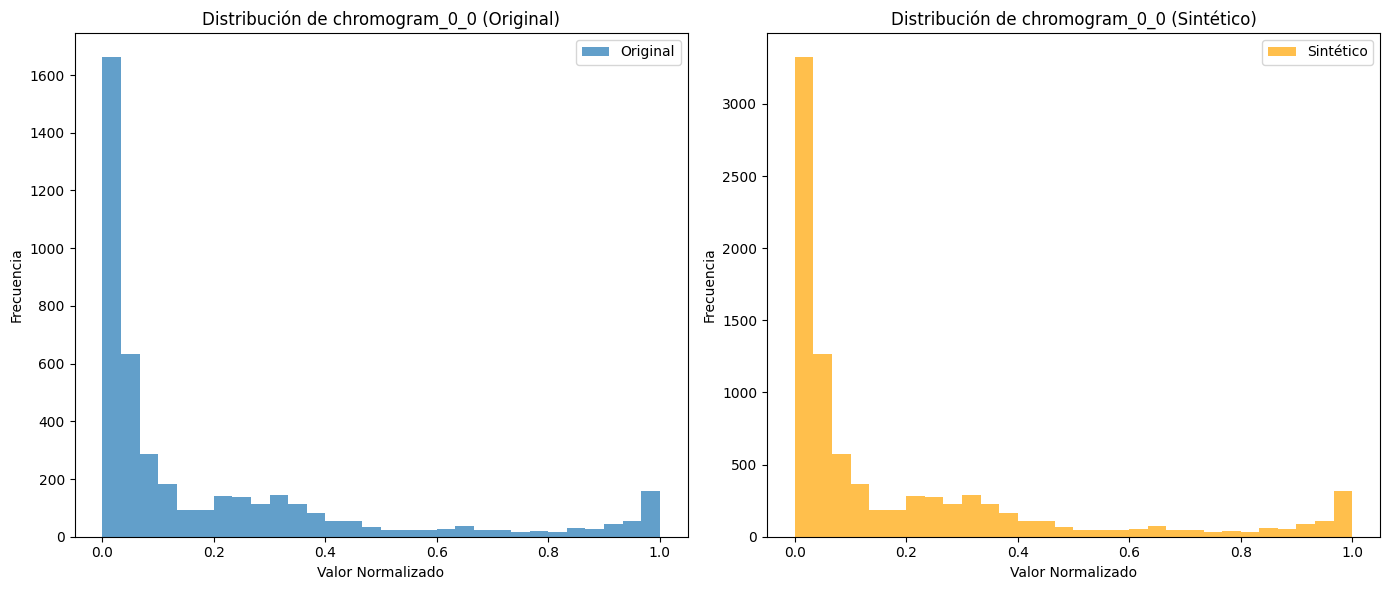

In [11]:
# 3. Crear gráficos representativos del dataset original y sintético

# Configura el tamaño de la figura para los gráficos
plt.figure(figsize=(14, 6))

# Primer gráfico: Distribución de 'chromogram_0_0' en el dataset original
plt.subplot(1, 2, 1)
plt.hist(dataset_ten_classes['chromogram_0_0'], bins=30, alpha=0.7, label='Original')
plt.title('Distribución de chromogram_0_0 (Original)')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()

# Segundo gráfico: Distribución de 'chromogram_0_0' en el dataset sintético
plt.subplot(1, 2, 2)
plt.hist(synthetic_data['chromogram_0_0'], bins=30, alpha=0.7, color='orange', label='Sintético')
plt.title('Distribución de chromogram_0_0 (Sintético)')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()

# Ajusta el diseño de los gráficos para que no se sobrepongan
plt.tight_layout()

# Muestra los gráficos
plt.show()


Se crea una figura con dos gráficos de dispersión para comparar dos características ('chromogram_0_0' y 'chromogram_0_1') entre un dataset original y un dataset sintético.


> Primero, se filtra el dataset sintético para mostrar solo la segunda mitad de los datos. Luego, se generan dos subgráficos: el primero muestra la distribución de las características en el dataset original, mientras que el segundo muestra la distribución en el dataset sintético filtrado.




> Ambos gráficos están coloreados según la variable species_numeric, y se configuran con títulos, leyendas, y etiquetas de ejes. Finalmente, se ajusta el diseño de la figura y se muestran los gráficos para facilitar la comparación visual.



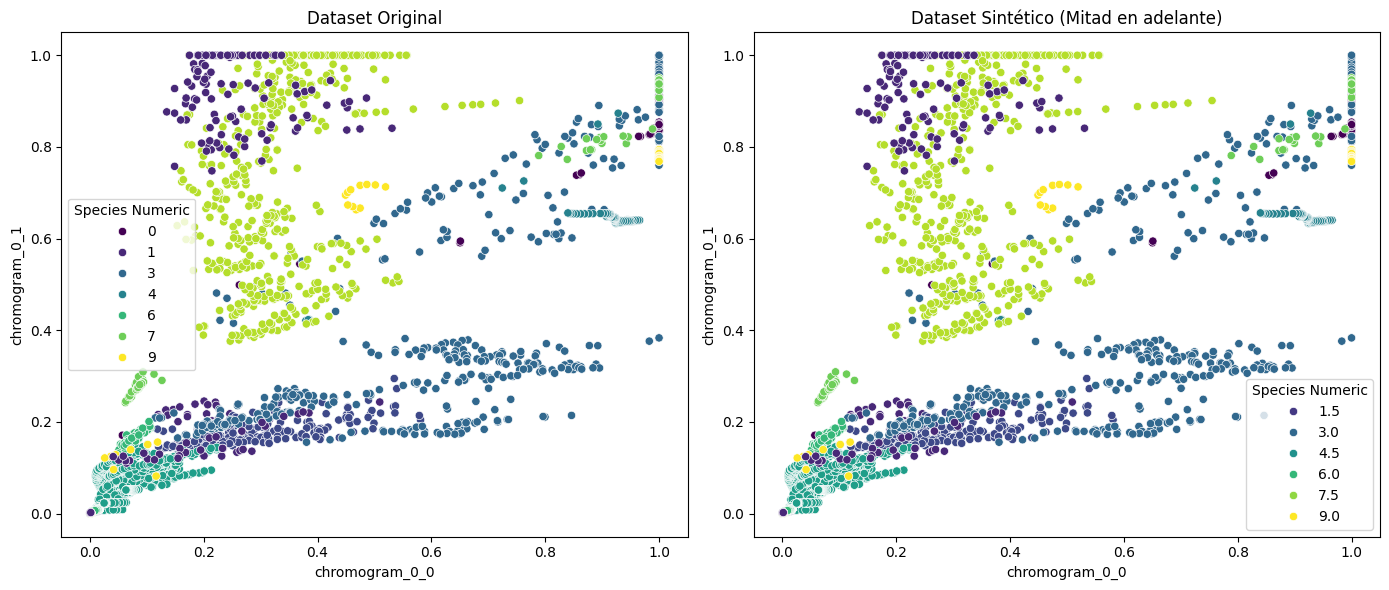

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las primeras dos características para graficar
features_to_plot = ['chromogram_0_0', 'chromogram_0_1']

# Filtrar el dataset sintético para mostrar solo la segunda mitad
mid_index = len(synthetic_data) // 2
synthetic_data_filtered = synthetic_data.iloc[mid_index:]

# Crear gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico del dataset original
sns.scatterplot(data=dataset_ten_classes, x=features_to_plot[0], y=features_to_plot[1], hue='species_numeric', palette='viridis', ax=axes[0])
axes[0].set_title('Dataset Original')
axes[0].legend(title='Species Numeric')
axes[0].set_xlabel(features_to_plot[0])
axes[0].set_ylabel(features_to_plot[1])

# Gráfico del dataset sintético (filtrado con perturbaciones)
sns.scatterplot(data=synthetic_data_filtered, x=features_to_plot[0], y=features_to_plot[1], hue='species_numeric', palette='viridis', ax=axes[1])
axes[1].set_title('Dataset Sintético (Mitad en adelante)')
axes[1].legend(title='Species Numeric')
axes[1].set_xlabel(features_to_plot[0])
axes[1].set_ylabel(features_to_plot[1])

plt.tight_layout()
plt.show()


# Dividir el dataset en datos de entrenamiento y prueba

Se realiza una división manual del dataset en conjuntos de entrenamiento y prueba, y preparan los datos para el entrenamiento de un modelo.


>  Primero, la función split_train_test divide las características (X) y las etiquetas (y) en conjuntos de entrenamiento y prueba con un 80% para entrenamiento y un 20% para prueba.



---

```
# X_train = X[idx[:-test_size]] y y_train = y[idx[:-test_size]] seleccionan las filas para el conjunto de entrenamiento usando todos los índices excepto los últimos test_size.

X_test = X[idx[-test_size:]] y y_test = y[idx[-test_size:]] seleccionan las filas para el conjunto de prueba usando los últimos test_size índices.
```






In [13]:
# 4. División manual del dataset en entrenamiento y prueba (80% - 20%)
def split_train_test(X, y, test_size=0.2):
    # Obtiene el número total de ejemplos en el dataset
    m = len(X)

    # Crea un array de índices que corresponden a cada ejemplo en el dataset
    idx = np.arange(m)

    # Baraja aleatoriamente los índices para asegurar una división aleatoria
    np.random.shuffle(idx)

    # Calcula el tamaño del conjunto de prueba basado en el porcentaje especificado
    test_size = int(m * test_size)

    # Divide los datos en conjuntos de entrenamiento y prueba
    # Usa los primeros 'm - test_size' índices para el conjunto de entrenamiento
    # Usa los últimos 'test_size' índices para el conjunto de prueba
    X_train = X[idx[:-test_size]]
    y_train = y[idx[:-test_size]]
    X_test = X[idx[-test_size:]]
    y_test = y[idx[-test_size:]]

    # Retorna los conjuntos de entrenamiento y prueba
    return X_train, X_test, y_train, y_test



> Asigna valores a X y y y aplica la división



In [14]:
# Separa las características (X) y las etiquetas (y) del dataset sintético, excluyendo la columna 'id' o la primera columna (índice 0)
X = synthetic_data.drop(['species_numeric', 'id'], axis=1).values  # Elimina las columnas 'species_numeric' e 'id' y convierte el resto en un array de numpy
y = synthetic_data['species_numeric'].values  # Extrae la columna 'species_numeric' como las etiquetas

# Divide los datos en conjuntos de entrenamiento y prueba usando la función definida previamente
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2)


>  Luego, se agrega una columna de unos a las matrices de características de entrenamiento y prueba (X_train_bias y X_test_bias) para incluir un término de intercepción en el modelo.


In [15]:
# Agregar una columna de unos para el término de intercepción

# Crea una nueva matriz X_train_bias agregando una columna de unos al principio de X_train
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]

# Crea una nueva matriz X_test_bias agregando una columna de unos al principio de X_test
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.


- **`sigmoid(z)`**:
  - **Tipo**: Función Sigmoidea.
  - **Uso**: Convierte valores a un rango entre 0 y 1, útil para probabilidades en clasificación binaria.

- **`compute_cost(theta, X, y, lambda_=1)`**:
  - **Tipo**: Binary Cross-Entropy Loss (con regularización L2).
  - **Uso**: Calcula el costo del modelo y el gradiente, mide el error entre las predicciones y las etiquetas reales.
  - **Regularización**: L2 (Ridge).
    - **Descripción**: Penaliza los valores grandes de los parámetros para evitar el sobreajuste. Añade un término al costo que es la suma de los cuadrados de los parámetros, excluyendo el término de interceptación.

- **`gradient_descent(X, y, theta, alpha, num_iters, lambda_)`**:
  - **Tipo**: Algoritmo de Optimización.
  - **Uso**: Ajusta los parámetros del modelo para minimizar la función de costo mediante descenso de gradiente.

In [16]:
#  Definir las funciones para la regresión logística usando numpy
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Evitar overflow en los valores extremos
    return 1 / (1 + np.exp(-z))


def compute_cost(theta, X, y, lambda_=1):
    m = y.size  # número de ejemplos

    # Si las etiquetas son booleanas, convertirlas a enteros
    if y.dtype == bool:
        y = y.astype(int)

    # Inicializar el costo y el gradiente
    J = 0
    grad = np.zeros(theta.shape)

    # Hipótesis de la regresión logística
    h = sigmoid(X.dot(theta.T))

    # Excluir el parámetro theta[0] para regularización (no regularizamos el término de intercepción)
    temp = theta.copy()
    temp[0] = 0

    # Función de costo regularizada
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # Gradiente regularizado
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

def gradient_descent(X, y, theta, alpha,num_iters, lambda_):
    m = y.size  # número de ejemplos
    theta = theta.copy()
    J_history = [] # Create an empty list to store cost values
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J, grad = compute_cost(theta, X, y, lambda_) # Calculate cost and gradient
        J_history.append(J) # Append the cost to the J_history list

    return theta, J_history # Return the theta and the J_history list


"""
def compute_cost(X, y, theta, lambda_):
    m = len(y)  # Número de ejemplos
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1/(2*m)) * (np.sum(errors**2) + lambda_ * np.sum(theta[1:]**2))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters, lambda_):
    m = len(y)  # Número de ejemplos
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors) + (lambda_/m) * theta
        theta -= alpha * gradient

        # Guardar el valor de la función de costo
        J_history[i] = compute_cost(X, y, theta, lambda_)

    return theta, J_history
"""


'\ndef compute_cost(X, y, theta, lambda_):\n    m = len(y)  # Número de ejemplos\n    predictions = X.dot(theta)\n    errors = predictions - y\n    cost = (1/(2*m)) * (np.sum(errors**2) + lambda_ * np.sum(theta[1:]**2))\n    return cost\n\ndef gradient_descent(X, y, theta, alpha, num_iters, lambda_):\n    m = len(y)  # Número de ejemplos\n    J_history = np.zeros(num_iters)\n\n    for i in range(num_iters):\n        predictions = X.dot(theta)\n        errors = predictions - y\n        gradient = (1/m) * X.T.dot(errors) + (lambda_/m) * theta\n        theta -= alpha * gradient\n\n        # Guardar el valor de la función de costo\n        J_history[i] = compute_cost(X, y, theta, lambda_)\n\n    return theta, J_history\n'



>  El proceso de entrenar los pesos del modelo se lleva a cabo dentro de la función de gradiente descendente. Esta función utiliza el dataset de entrenamiento para ajustar los parámetros del modelo en función de la tasa de aprendizaje y el número de iteraciones, optimizando el costo y mejorando el modelo.



# Función de Entrenamiento OvA
Para cada clase, convierte las etiquetas en binarias, entrena un clasificador usando descenso de gradiente, y guarda los parámetros y el historial del costo. Finalmente, devuelve todos los parámetros y el historial del costo para cada clase.

In [17]:
# Entrenar un modelo One-vs-All con las 10 clases
def train_one_vs_all(X, y, num_classes, alpha, num_iters, lambda_=1):
    m, n = X.shape  # Obtiene el número de ejemplos (m) y el número de características (n)
    all_theta = np.zeros((num_classes, n))  # Inicializa un array para los parámetros de cada clase
    all_J_history = []  # Inicializa una lista para almacenar el historial del costo

    # Entrena un clasificador para cada clase
    for c in range(num_classes):
        print(f"Entrenando clase {c}...")  # Imprime el progreso del entrenamiento para la clase actual
        initial_theta = np.zeros(n)  # Inicializa los parámetros para la clase actual
        y_c = (y == c).astype(int)  # Convierte las etiquetas en binarias para la clase c
        theta, J_history = gradient_descent(X, y_c, initial_theta, alpha, num_iters, lambda_)  # Entrena el clasificador usando descenso de gradiente
        all_theta[c] = theta  # Almacena los parámetros entrenados para la clase c
        all_J_history.append(J_history)  # Guarda el historial del costo para la clase c

    return all_theta, all_J_history  # Devuelve los parámetros y el historial del costo para todas las clases




> Aquí se definen los hiperparámetros y se entrena un modelo de clasificación usando el enfoque One-vs-All.



In [18]:
# Definimos hiperparámetros
theta = np.zeros(X.shape[1])
alpha = 0.1        # Tasa de aprendizaje (learning rate): Controla el tamaño de los pasos que da el algoritmo para actualizar los pesos en cada iteración
num_iters = 300    # Número de iteraciones: Indica cuántas veces se actualarán los pesos del modelo durante el entrenamiento
lambda_ = 0.01     # Parámetro de regularización: Evita el sobreajuste penalizando los pesos grandes y mejorando la generalización del modelo
num_classes = 10   # Número de clases: Define cuántas clases hay en el problema de clasificación. En este caso, tenemos 10 clases diferentes

# Entrenamos el modelo

# all_theta almacena los parámetros (pesos) aprendidos para cada clase
# all_J_history almacena el valor de la función de costo (J) en cada iteración para monitorear la convergencia del entrenamiento
all_theta, all_J_history = train_one_vs_all(X_train_bias, y_train, num_classes, alpha, num_iters, lambda_)

Entrenando clase 0...
Entrenando clase 1...
Entrenando clase 2...
Entrenando clase 3...
Entrenando clase 4...
Entrenando clase 5...
Entrenando clase 6...
Entrenando clase 7...
Entrenando clase 8...
Entrenando clase 9...


# Visualización la evolución del costo para todas las clases


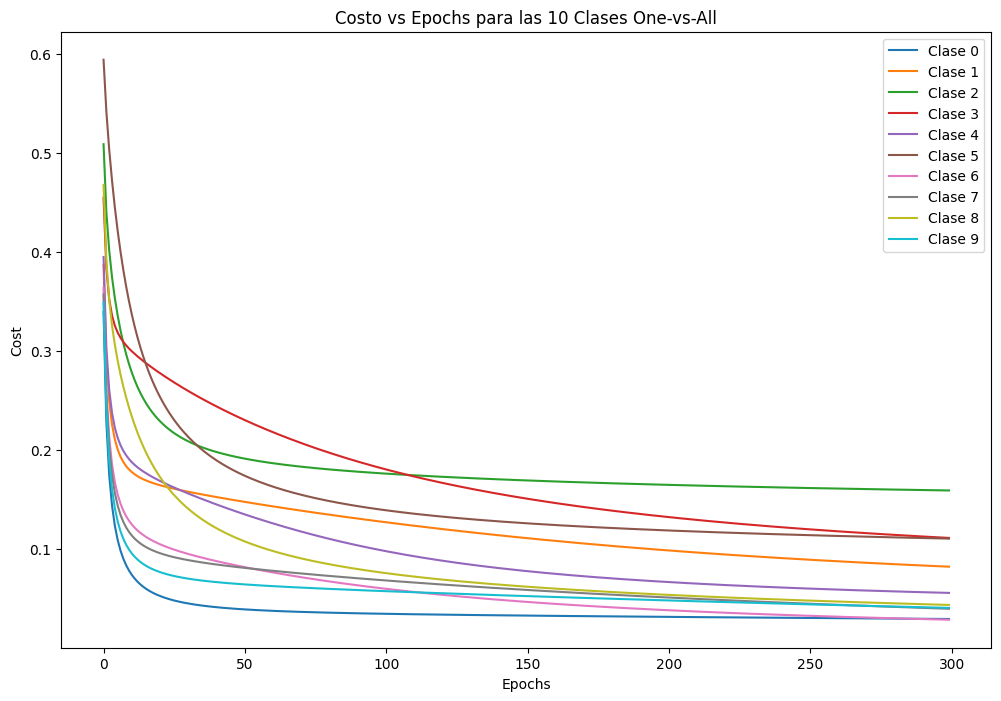

In [19]:

# Crear una figura de tamaño 12x8 para los gráficos
plt.figure(figsize=(12, 8))

# Recorrer cada clase y graficar la evolución del costo (J) durante las iteraciones
for i in range(num_classes):
    plt.plot(all_J_history[i], label=f'Clase {i}')  # Graficar la función de costo para la clase 'i'

# Etiquetas de los ejes
plt.xlabel('Epochs')  # Eje X muestra el número de iteraciones (o epocas)
plt.ylabel('Cost')    # Eje Y muestra el valor del costo

# Título del gráfico
plt.title('Costo vs Epochs para las 10 Clases One-vs-All')

# Mostrar la leyenda con las etiquetas de las clases
plt.legend()

# Mostrar el gráfico
plt.show()


# Definición de la Función de Predicción:


> predict_one_vs_all(X, all_theta): Define una función que toma las características X y los parámetros del modelo all_theta para predecir las clases.

> Añadir blockquoteDentro de la función, se calcula la probabilidad de cada clase para todas las muestras usando la función sigmoidea. La multiplicación matricial X @ all_theta.T genera un puntaje para cada clase, y np.argmax selecciona la clase con el puntaje más alto para cada muestra.




In [20]:
# Hacer predicciones

# Función para predecir las clases usando el modelo One-vs-All
def predict_one_vs_all(X, all_theta):
    # Calcula la probabilidad de cada clase para todas las muestras usando la función sigmoid
    # X @ all_theta.T es la multiplicación matricial entre las características X y los parámetros del modelo (transpuestos)
    # np.argmax selecciona el índice de la clase con la mayor probabilidad
    return np.argmax(sigmoid(X @ all_theta.T), axis=1)


# Generación de Predicciones:


> y_pred_train = predict_one_vs_all(X_train_bias, all_theta): Usa la función para hacer predicciones sobre el conjunto de entrenamiento.


> y_pred_test = predict_one_vs_all(X_test_bias, all_theta): Usa la función para hacer predicciones sobre el conjunto de prueba.





In [21]:
# Predicciones para el conjunto de entrenamiento
y_pred_train = predict_one_vs_all(X_train_bias, all_theta)

# Predicciones para el conjunto de prueba
y_pred_test = predict_one_vs_all(X_test_bias, all_theta)



> Visualizar cómo cambia el costo a lo largo del entrenamiento para cada clase en el modelo One-vs-All.



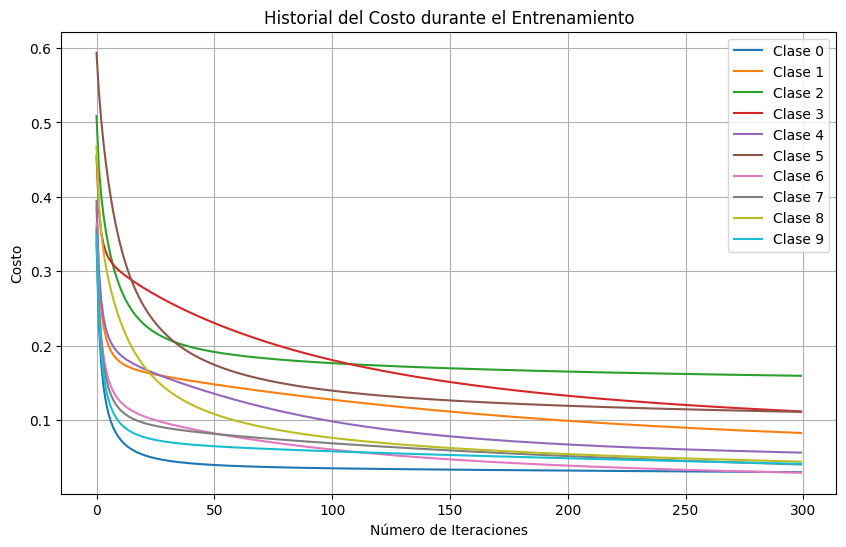

In [22]:
# Graficar el historial de costos
plt.figure(figsize=(10, 6))

# Iterar sobre cada clase para graficar el costo en función de las iteraciones
for c in range(num_classes):
    plt.plot(range(num_iters), all_J_history[c], label=f'Clase {c}')

plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.title('Historial del Costo durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Evalución de la precisión del modelo
Mide y muestra cuán bien el modelo clasifica correctamente las muestras en ambos conjuntos de datos.

In [23]:

# Calcula la precisión en el conjunto de entrenamiento
train_accuracy = np.mean(y_pred_train == y_train) * 100

# Calcula la precisión en el conjunto de prueba
test_accuracy = np.mean(y_pred_test == y_test) * 100

# Imprime la precisión para ambos conjuntos
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.2f}%")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}%")


Precisión en el conjunto de entrenamiento: 82.52%
Precisión en el conjunto de prueba: 83.43%
